In [18]:
import imageio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from scipy import ndimage as ndi
from ipywidgets import interact

%matplotlib inline

In [14]:
filelist = glob.glob('/home/bjorn/Documents/CU/PHYS_4430/Data/run1/2018*.txt')
video_raw = np.zeros((len(filelist),480,640))
for i in np.arange(len(filelist)):
    video_raw[i] = np.loadtxt(filelist[i])
    
mean_frame = video_raw.mean(axis=0)

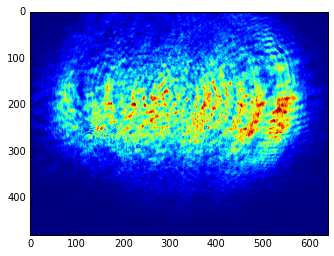

In [15]:
plt.imshow(video_raw[10])

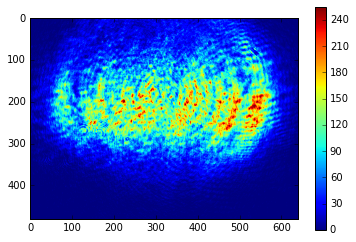

In [16]:
plt.imshow(mean_frame)
plt.colorbar()

In [22]:
video_bg = video_raw - mean_frame

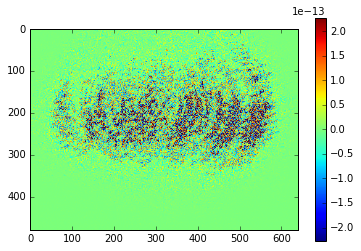

In [25]:
tot_frame = np.sum(video_bg, axis = 0)
plt.imshow(tot_frame)
plt.colorbar()

In [19]:
@interact(σ = (5,100,5), continuous_update = False)
def plot_frame(σ):
    plt.imshow(mean_frame - ndi.filters.gaussian_filter(mean_frame, sigma = σ))

interactive(children=(IntSlider(value=50, description='σ', min=5, step=5), Output()), _dom_classes=('widget-interact',))